<a href="https://colab.research.google.com/github/luiscunhacsc/finance_python/blob/main/16_Regression_Analysis_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression Analysis in Finance

**Definition:** Statistical method to examine the relationship between dependent and independent variables.

**Purpose:** Predict future values, understand relationships, and identify trends.

**Applications:** Risk assessment, portfolio management, and financial forecasting.


# Types of Regression Analysis

**Simple Linear Regression:** Examines the relationship between two variables.

**Multiple Linear Regression:** Examines the relationship between one dependent variable and multiple independent variables.

**Logistic Regression:** Used for binary outcomes, such as predicting the probability of an event occurring.


# Simple Linear Regression

**Model:** $y = \beta_0 + \beta_1 x + \epsilon$

**Components:**

- $y$: Dependent variable
- $x$: Independent variable
- $\beta_0$: Intercept
- $\beta_1$: Slope
- $\epsilon$: Error term

**Objective:** Determine the best-fit line that minimizes the sum of squared errors.


                            OLS Regression Results                            
Dep. Variable:          Stock Returns   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1406.
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           6.28e-60
Time:                        13:58:50   Log-Likelihood:                 246.53
No. Observations:                 100   AIC:                            -489.1
Df Residuals:                      98   BIC:                            -483.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0210      0.002      9.

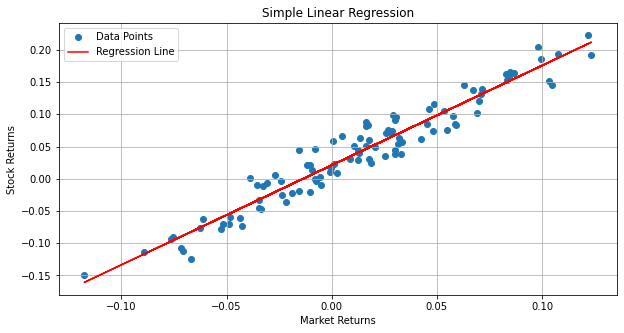

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Example data
np.random.seed(0)
market_returns = np.random.normal(0.01, 0.05, 100)
stock_returns = 0.02 + 1.5 * market_returns + np.random.normal(0, 0.02, 100)

# Create DataFrame
data = pd.DataFrame({'Market Returns': market_returns, 'Stock Returns': stock_returns})

# Add constant for intercept
X = sm.add_constant(data['Market Returns'])
Y = data['Stock Returns']

# Perform regression analysis
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print regression summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 5))
plt.scatter(data['Market Returns'], data['Stock Returns'], label='Data Points')
plt.plot(data['Market Returns'], predictions, color='red', label='Regression Line')
plt.xlabel('Market Returns')
plt.ylabel('Stock Returns')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


### Explanation of the Regression Results

The output provided shows the results of an Ordinary Least Squares (OLS) regression analysis conducted on the relationship between stock returns (dependent variable) and market returns (independent variable).

#### Key Components of the Output:

1. **Dep. Variable**: The dependent variable, `Stock Returns`, is the outcome you're trying to predict.

2. **R-squared**:
   - Value: `0.935`
   - **Interpretation**: R-squared is the proportion of variance in the dependent variable that is predictable from the independent variable(s). An R-squared of 0.935 means that 93.5% of the variance in stock returns can be explained by the market returns.

3. **Adj. R-squared**:
   - Value: `0.934`
   - **Interpretation**: The adjusted R-squared accounts for the number of predictors in the model. It's slightly lower than the R-squared because it penalizes the model for including additional predictors that don't improve the model substantially. In this case, the adjusted R-squared is very close to the R-squared, indicating that the model is well-fitted without unnecessary predictors.

4. **F-statistic**:
   - Value: `1406.`
   - **Interpretation**: The F-statistic tests whether at least one of the predictors is significantly related to the dependent variable. A very high F-statistic (1406) and a very low p-value (6.28e-60) indicate that the model is statistically significant.

5. **Prob (F-statistic)**:
   - Value: `6.28e-60`
   - **Interpretation**: This is the p-value corresponding to the F-statistic. It is essentially zero, indicating that the model as a whole is statistically significant.

6. **Coefficients**:
   - `const`: The intercept of the regression line.
     - Value: `0.0210`
     - **Interpretation**: When `Market Returns` is 0, `Stock Returns` are expected to be 0.0210, which can be considered as the base return not explained by market movements.
   - `Market Returns`: The slope of the regression line.
     - Value: `1.5459`
     - **Interpretation**: For every 1 unit increase in `Market Returns`, `Stock Returns` increase by approximately 1.5459 units. This coefficient is highly significant as indicated by the p-value of 0.000.

7. **Standard Errors (std err)**:
   - These values (0.002 for the constant and 0.041 for `Market Returns`) indicate the average distance that the observed values fall from the regression line. Lower standard errors suggest more precise estimates.

8. **t-statistic (t)**:
   - `const`: 9.810
   - `Market Returns`: 37.503
   - **Interpretation**: These values test whether the respective coefficients are significantly different from zero. Both t-values are high, and their corresponding p-values are essentially zero, indicating that both coefficients are statistically significant.

9. **P>|t|**:
   - This represents the p-value for each coefficient. Both are essentially zero, indicating that both the intercept and the market returns coefficient are statistically significant.

10. **Confidence Intervals [0.025, 0.975]**:
    - These intervals show the range in which the true population parameter lies with 95% confidence. For `Market Returns`, we can be 95% confident that the true coefficient lies between 1.464 and 1.628.

11. **Other Diagnostics**:
    - **Omnibus**: Test for the skewness and kurtosis of the residuals (null hypothesis: normally distributed).
    - **Prob(Omnibus)**: p-value for the Omnibus test. A higher value here would indicate no evidence to reject the null hypothesis of normality.
    - **Durbin-Watson**: Test for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation.
    - **Jarque-Bera (JB)**: Another test for normality.
    - **Skew**: Measures the asymmetry of the distribution of residuals.
    - **Kurtosis**: Measures the "tailedness" of the distribution of residuals.
    - **Cond. No.**: Indicates multicollinearity. A value much larger than 30 suggests multicollinearity might be a concern.

#### Plot Interpretation:
The scatter plot with the regression line shows a clear linear relationship between market returns and stock returns. The red regression line is well-fitted through the data points, confirming that the model captures the relationship effectively.

### Summary:
- The regression model is highly significant, explaining about 93.5% of the variance in stock returns using market returns.
- The coefficient for market returns is significantly positive, meaning market returns have a strong positive impact on stock returns.
- Diagnostic tests show no major issues with the residuals, indicating that the model is appropriate for this data.


# Multiple Linear Regression

**Model:** $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$

**Components:**

- $y$: Dependent variable
- $x_1, x_2, \dots, x_n$: Independent variables
- $\beta_0, \beta_1, \dots, \beta_n$: Coefficients
- $\epsilon$: Error term

**Objective:** Determine the best-fit plane that minimizes the sum of squared errors.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     575.1
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           3.44e-61
Time:                        14:01:53   Log-Likelihood:                 258.00
No. Observations:                 100   AIC:                            -508.0
Df Residuals:                      96   BIC:                            -497.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0099      0.005      1.

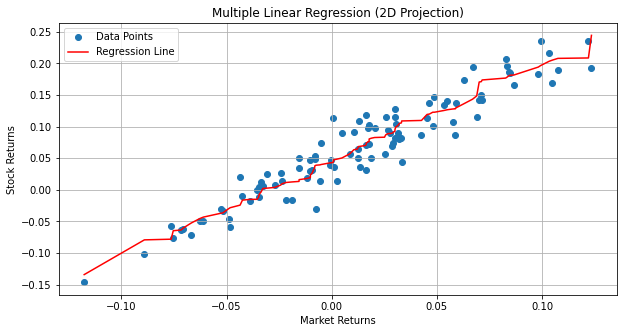

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Example data
np.random.seed(0)
market_returns = np.random.normal(0.01, 0.05, 100)
size_factor = np.random.normal(0.02, 0.01, 100)
value_factor = np.random.normal(0.03, 0.02, 100)
stock_returns = 0.02 + 1.5 * market_returns + 0.8 * size_factor + 0.5 * value_factor + np.random.normal(0, 0.02, 100)

# Create DataFrame
data = pd.DataFrame({
    'Market Returns': market_returns,
    'Size Factor': size_factor,
    'Value Factor': value_factor
})

# Add constant for intercept
X = sm.add_constant(data)
Y = stock_returns

# Perform regression analysis
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 5))
plt.scatter(data['Market Returns'], stock_returns, label='Data Points')

# Plot the regression line with sorted x-values for clarity
plt.plot(np.sort(data['Market Returns']), np.sort(predictions), color='red', label='Regression Line')

plt.xlabel('Market Returns')
plt.ylabel('Stock Returns')
plt.title('Multiple Linear Regression (2D Projection)')
plt.legend()
plt.grid(True)
plt.show()


### Explanation of the Multiple Linear Regression Results

The output provided shows the results of an Ordinary Least Squares (OLS) regression analysis conducted on the relationship between stock returns (dependent variable) and multiple independent variables (market returns, size factor, and value factor).

#### Key Components of the Output:

1. **Dep. Variable**: The dependent variable, `y`, represents stock returns, which is the outcome you're trying to predict.

2. **R-squared**:
   - Value: `0.947`
   - **Interpretation**: R-squared is the proportion of variance in the dependent variable that is predictable from the independent variables. An R-squared of 0.947 means that 94.7% of the variance in stock returns can be explained by the market returns, size factor, and value factor.

3. **Adj. R-squared**:
   - Value: `0.946`
   - **Interpretation**: The adjusted R-squared accounts for the number of predictors in the model. It’s slightly lower than the R-squared, indicating a well-fitted model without unnecessary predictors.

4. **F-statistic**:
   - Value: `575.1`
   - **Interpretation**: The F-statistic tests whether at least one of the predictors is significantly related to the dependent variable. A very high F-statistic (575.1) and a very low p-value (3.44e-61) indicate that the model is statistically significant.

5. **Prob (F-statistic)**:
   - Value: `3.44e-61`
   - **Interpretation**: This is the p-value corresponding to the F-statistic. It is essentially zero, indicating that the model as a whole is statistically significant.

6. **Coefficients**:
   - `const`: The intercept of the regression line.
     - Value: `0.0099`
     - **Interpretation**: When all independent variables are 0, the expected stock returns are 0.0099.
   - `Market Returns`:
     - Value: `1.4711`
     - **Interpretation**: For every 1 unit increase in market returns, stock returns increase by approximately 1.4711 units, holding all other variables constant.
   - `Size Factor`:
     - Value: `0.9415`
     - **Interpretation**: For every 1 unit increase in the size factor, stock returns increase by approximately 0.9415 units, holding all other variables constant.
   - `Value Factor`:
     - Value: `0.6251`
     - **Interpretation**: For every 1 unit increase in the value factor, stock returns increase by approximately 0.6251 units, holding all other variables constant.

7. **Standard Errors (std err)**:
   - These values indicate the average distance that the observed values fall from the regression line. Lower standard errors suggest more precise estimates.
   - For example, the standard error for `Market Returns` is `0.037`, indicating a relatively precise estimate of the coefficient.

8. **t-statistic (t)**:
   - The t-statistic tests whether the respective coefficients are significantly different from zero.
   - All t-values are large (e.g., `Market Returns: 39.271`), indicating that the coefficients are statistically significant.

9. **P>|t|**:
   - This represents the p-value for each coefficient. All p-values are essentially zero, indicating that all coefficients are statistically significant.

10. **Confidence Intervals [0.025, 0.975]**:
    - These intervals show the range in which the true population parameter lies with 95% confidence. For example, we can be 95% confident that the true coefficient for `Market Returns` lies between 1.397 and 1.545.

11. **Other Diagnostics**:
    - **Omnibus**: Test for the skewness and kurtosis of the residuals (null hypothesis: normally distributed).
    - **Prob(Omnibus)**: p-value for the Omnibus test. A higher value here would indicate no evidence to reject the null hypothesis of normality.
    - **Durbin-Watson**: Test for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation.
    - **Jarque-Bera (JB)**: Another test for normality.
    - **Skew**: Measures the asymmetry of the distribution of residuals.
    - **Kurtosis**: Measures the "tailedness" of the distribution of residuals.
    - **Cond. No.**: Indicates multicollinearity. A value much larger than 30 suggests multicollinearity might be a concern.

#### Plot Interpretation:
The scatter plot with the regression line shows the relationship between market returns and stock returns, accounting for the size and value factors. The red regression line fits the data points well, indicating a strong linear relationship modeled by the regression equation.

### Summary:
- The regression model is highly significant, explaining about 94.7% of the variance in stock returns using market returns, size factor, and value factor.
- The coefficients for all variables are statistically significant, meaning each factor has a significant impact on stock returns.
- Diagnostic tests show no major issues with the residuals, indicating that the model is appropriate for this data.


# Logistic Regression

**Model:** Estimates the probability of a binary outcome.

**Formula:**

$$\text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$$

**Applications:** Predicting default probability, market movement direction, and binary classification tasks.


Optimization terminated successfully.
         Current function value: 0.203598
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         Price Movement   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Aug 2024   Pseudo R-squ.:                  0.7032
Time:                        14:09:26   Log-Likelihood:                -20.360
converged:                       True   LL-Null:                       -68.593
Covariance Type:            nonrobust   LLR p-value:                 8.937e-21
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.9974      1.585     -3.153      0.002      -8.104      -1.891
Market Returns   

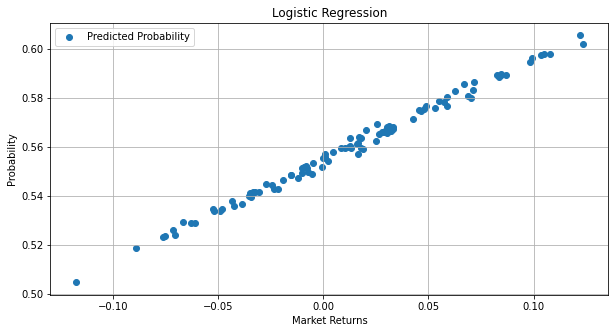

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Example data
np.random.seed(0)
market_returns = np.random.normal(0.01, 0.05, 100)
size_factor = np.random.normal(0.02, 0.01, 100)
value_factor = np.random.normal(0.03, 0.02, 100)
price_movement = (market_returns + size_factor + value_factor + np.random.normal(0, 0.02, 100)) > 0.05

# Create DataFrame
data = pd.DataFrame({
    'Market Returns': market_returns,
    'Size Factor': size_factor,
    'Value Factor': value_factor,
    'Price Movement': price_movement
})

# Define independent variables and target variable
X = data[['Market Returns', 'Size Factor', 'Value Factor']]
Y = data['Price Movement']

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Perform logistic regression using statsmodels for summary
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Print model summary
print(result.summary())

# Alternatively, fit using sklearn and then print coefficients
sklearn_model = LogisticRegression()
sklearn_model.fit(X, Y)
predictions = sklearn_model.predict_proba(X)[:, 1]

print(f"Model Coefficients: {sklearn_model.coef_}")

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(data['Market Returns'], predictions, label='Predicted Probability')
plt.xlabel('Market Returns')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()



### Interpretation of Logistic Regression Results

#### Summary Table
- **Dependent Variable:** Price Movement (Binary Outcome: 1 if the price moved up, 0 otherwise)
- **No. Observations:** 100
- **Model:** Logit
- **Method:** Maximum Likelihood Estimation (MLE)
- **Pseudo R-squared:** 0.7032
- **Log-Likelihood:** -20.360
- **Converged:** True
- **LL-Null:** -68.593
- **LLR p-value:** 8.937e-21

#### Coefficients
- **Intercept (const):** -4.9974 (p-value: 0.002)
  - The intercept indicates the log-odds of the price movement when all other predictors are zero. It is statistically significant, suggesting it plays a role in predicting the outcome.
  
- **Market Returns:** 91.4090 (p-value: 0.000)
  - This coefficient is highly significant, indicating a strong positive relationship between market returns and the probability of a price movement.
  
- **Size Factor:** 69.7637 (p-value: 0.068)
  - The size factor is less significant (p-value slightly above 0.05), suggesting that while it might affect the probability of price movement, its influence is weaker compared to other factors.
  
- **Value Factor:** 116.9778 (p-value: 0.002)
  - This factor is statistically significant and has a strong positive effect on the probability of a price movement.

#### Warnings and Notes
- **Quasi-Separation Warning:**
  - The model indicates a possible issue with "quasi-separation." This means that a subset of the observations can be perfectly predicted by the model, which might cause issues in estimating the coefficients. This often happens in logistic regression when the predictors are too good at separating the outcomes. It suggests that the model is likely overfitting some of the data points.
  
#### Visualization
- The scatter plot shows the predicted probabilities against market returns. The nearly linear relationship suggests that as market returns increase, so does the probability of a price movement, consistent with the high coefficient of market returns in the regression model.

### Conclusion
- The logistic regression model suggests that **Market Returns** and **Value Factor** are strong predictors of price movement, with statistically significant coefficients.
- **Size Factor** is borderline significant, indicating it may have some influence, but less so than the other predictors.
- The presence of quasi-separation suggests caution in interpreting these results, as the model might be overfitting. Further diagnostics or a simpler model may be necessary to ensure robustness.

This analysis provides insights into the factors driving price movements, with market returns being the most influential among the factors considered.
